# Análisis del proceso de transpilación

En este NoteBook analizamos las transformaciones que lleva a cabo el transpilador para adaptar un circuito a las puertas y las conexiones disponibles en un computador real. 
Empezamos elegiendo el computador e imprimiendo sus características.

**Nota:** Como el computador lima ya no está disponible, elijo para este ejemplo su fake backend. Alternativamente, se puede transpilar el circuito introduciendo durante el proceso de transpilación las puertas base del computador Lima y su mapa de acoplamiento. 

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeLimaV2
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_gate_map

#Elijo como backend el computador ibmq_lima
backend=FakeLimaV2()


In [3]:
#Imprimo sus puertas básicas y su mapa de acoplamiento
print(backend.operation_names)
print(backend.coupling_map)

['id', 'rz', 'sx', 'x', 'cx', 'reset', 'measure', 'delay']
[[4, 3], [3, 4], [0, 1], [1, 0], [3, 1], [1, 3], [2, 1], [1, 2]]


Fíjate que en los BackendsV2 las puertas basicas se consigen a través del atributo **operation_names**.

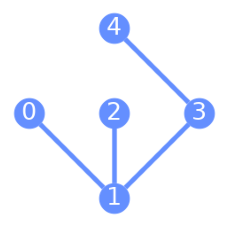

In [4]:
#Dibujo su mapa de acomplamiento 
plot_gate_map(backend)

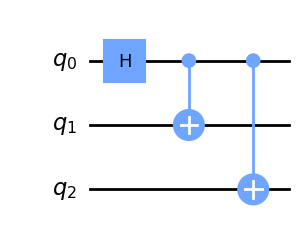

In [4]:
#Creo el circuito de 3 qubits y lo dibujo
qc=QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()



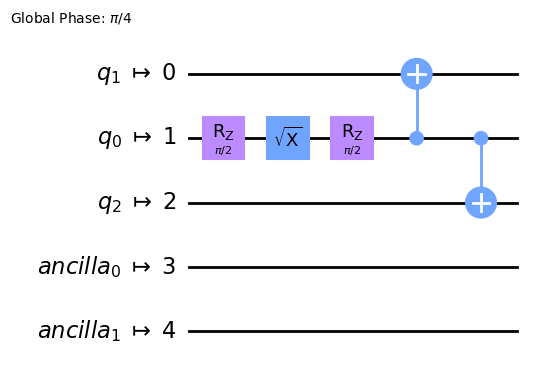

In [5]:
#Transpilo el circuito y lo dibujo
tqc=transpile(qc,backend)
tqc.draw()

El transpilador ha mapeado los cúbits virtuales 0, 1 y 2 a los cúbits físicos 1, 0 y 2, respectivamente, para sortear la falta de conexión entre los cúbits 0 y 2 También ha sustituido la puerta Hadamard por la secuencia de puertas RZ(PI/2), SX y RZ(PI/2).

Si ahora forzamos que los qubits virtuales se correspondan con los físicos, el transpilador tendría que insertar una puerta swap.


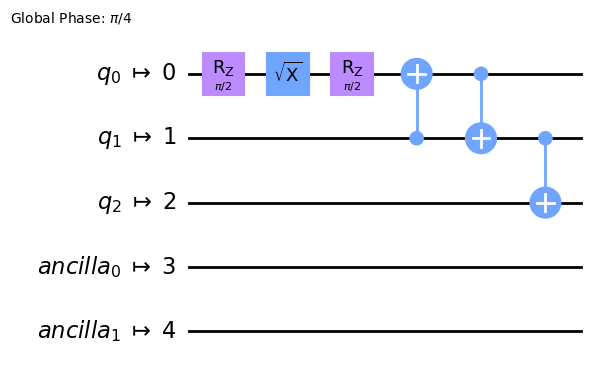

In [8]:
#Transpilo el circuito y lo dibujo
tqc=transpile(qc,backend,initial_layout=[0,1,2])
tqc.draw()

Ha insertado una swap y ha hecho simplificaciones (ha eliminado 2 cnot consecutivas ya que se corresponderían con la identidad). 

Algunos pases del transpilador son estocásticos, es decir, ejecutando varias veces el transpilador sobre el mismo circuito podríamos obtener resultados diferentes.

En vez de utilizar el Fake Backend podríamos haber definido el conjunto de puertas base y el mapa de acoplamiento de Lima y el resultado sería equivalente. 

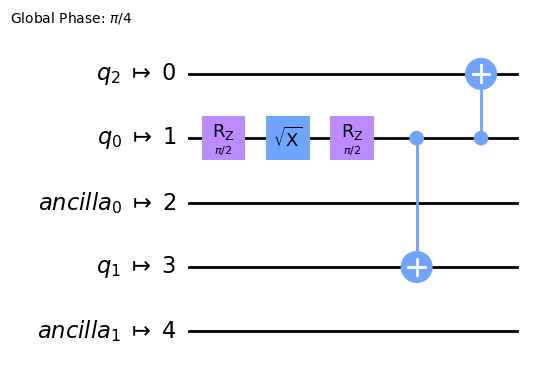

In [9]:
#Defino las puertas base y el mapa de acoplamiento
custom_gates=['cx', 'id', 'rz', 'sx', 'x']
custom_map=[[0,1],[1,0],[1,2],[2,1],[1,3],[3,1],[3,4],[4,3]]

tqc=transpile(qc,basis_gates=custom_gates, coupling_map=custom_map)
tqc.draw()	

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table